In [1]:
# Data Processing
import pandas as pd
import numpy as np
# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
# Scaling
from sklearn.preprocessing import StandardScaler
# Statistical Analysis
from scipy import stats
# Modeling
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 

import warnings 
warnings.filterwarnings("ignore")

In [2]:
orig_url = "https://drive.google.com/file/d/15pRixHlHOxnx6qixvMSY_zyUfYUr48TA/view?usp=sharing"
file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
df = pd.read_csv(dwn_url)
print(df.shape)
df.head()

(8500, 18)


,customer_id,balance_account,purchases_amount,paid_advance,full_purchases,balance_frequency_update,installments,purchases_frequency,full_purchases_frequency,purchases_installments_frequency,cash_advance_frequency,nr_cash_advances,nr_purchases,credit_limit,fixed_rate_period,payments,min_payments,full_payment_prc
0,tGEg8fT2eCgVxdwS,9.298409,107.60,0.000000,0.00,0.909091,107.6,0.909091,0.000000,0.818182,0.000000,0,10,1000.0,11,89.868853,89.711672,0.428571
1,stEDu20sSKOXomjg,52.666422,150.30,0.000000,0.00,1.000000,150.3,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,6,54.722514,82.955180,0.000000
2,CEB2blrN3b88GsRe,1360.795674,0.00,462.861443,0.00,1.000000,0.0,0.000000,0.000000,0.000000,0.272727,6,0,1500.0,11,303.031979,443.781316,0.000000
3,0N0eBl8ySaZThxKE,2021.641161,363.18,0.000000,363.18,1.000000,0.0,1.000000,1.000000,0.000000,0.000000,0,13,2000.0,12,704.240770,795.859808,0.000000
4,6NLauoHUwtwOv4Wy,22.322374,95.00,1162.045833,95.00,0.363636,0.0,0.083333,0.083333,0.000000,0.166667,3,1,2500.0,12,4094.261427,40.142262,0.000000


In [4]:
non_categorical_data = df.drop(['customer_id'], axis=1)
# Drop rows with missing credit_limit values
non_categorical_data.dropna(subset=["min_payments"], inplace=True)
# Drop rows with missing credit_limit values
non_categorical_data.dropna(subset=["credit_limit"], inplace=True)

In [19]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(non_categorical_data), columns=non_categorical_data.columns)
z = np.abs(stats.zscore(df_scaled))
df_scaled_out = df_scaled[(z < 3).all(axis=1)]
pca = PCA(random_state=42).fit(df_scaled_out)
pca_data = pca.transform(df_scaled_out) 
pca_labels = ['PC' + str(component) for component in range(1,len(pca.components_)+1)]
pca_df = pd.DataFrame(pca_data, columns=pca_labels)
pca_clusters = pd.DataFrame(pca_df[['PC1','PC2']])

In [20]:
k_means_clusters = KMeans(n_clusters=3,random_state=42).fit(pca_clusters)
cluster_center = k_means_clusters.cluster_centers_
cluster_preds = k_means_clusters.predict(pca_clusters)

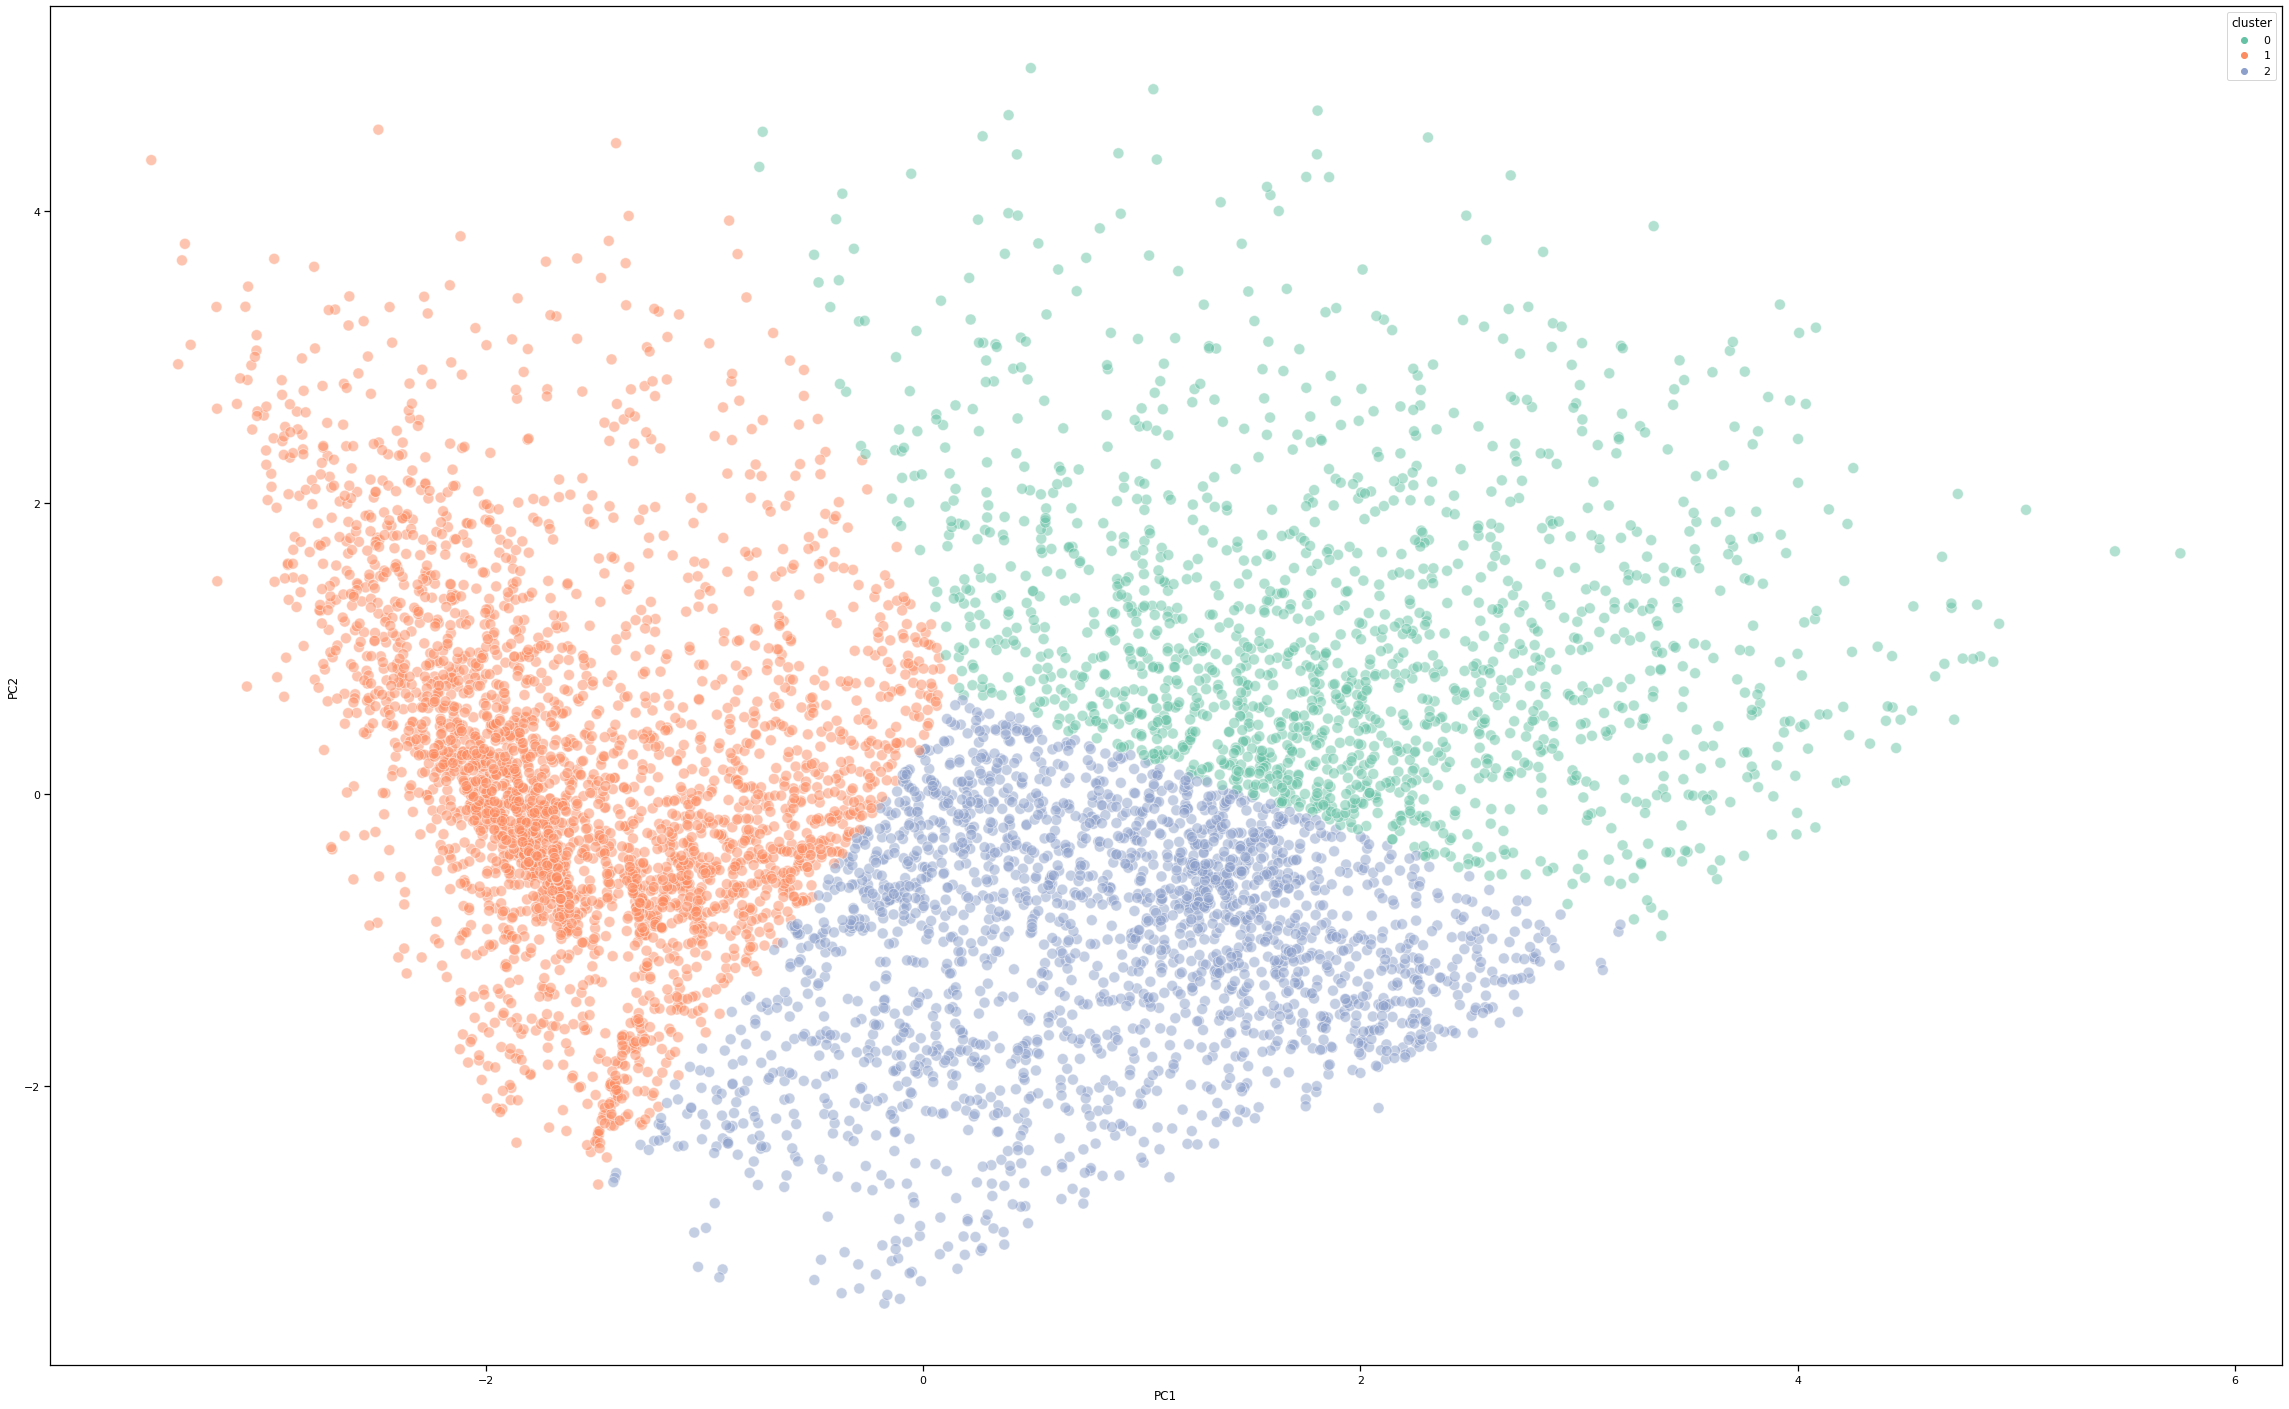

In [27]:
pca_clusters['cluster'] = cluster_preds

plt.figure(figsize=(40,25))
sns.set_context(context = 'notebook', font_scale=1)

sns.scatterplot(x = 'PC1', y = 'PC2',
                hue = 'cluster',
                data = pca_clusters,
                palette='Set2',
                alpha=0.5,
                s=120
                )

plt.show()